# Demo: Nonloc heatflux

This notebook provide a demo case on the application of the heat conduction solver.
<br>

## Geometry & Computational Grid
In this case, we will consider a 1d plasma with temperature, electron density, ionization rate and Knudsen number profiles, provided by kinetic simulation with length $L  = 0.19$ cm.  We will use $N=200$ nodes for this profile. As you can see, the grid spacing, $dx$ will be $L/(N-1)=954$ $\mu \mathrm{m}$.

Next cell is setting a python path. Since my Jupyter environment uses different path as default, I have to set correct path manually for the notebook

In [125]:
import os
os.chdir('/home/bogdanov1/bachproject/bachproject/') 

First, import parameter module in order to get a Pandas series containing all the parameters.
Last two rows contain a NN training part. The `io.capture_output` function is used to avoid the overfilling of output (to many messages are displayed and VS Code can't manage that)

In case coefficients $\alpha$ and $\beta$ are defined without using the NN, use `model = None`

In [1]:
from IPython.utils import io
import NN_training
%matplotlib widget
with io.capture_output() as captured:
    #model=NN_training.train_model(100) #argument is the number of epochs
    model=None 


All parameters of the problem, such as number of used profiles points, boundary conditions, definition of parameters $\alpha$ and $\beta$, number of timesteps and its magnitude $dt$ are contained and may be modified in `parameter.py` file.

`importlib` module and `reload` function in particullar are used to update modules if modified

In [3]:
import importlib
import parameter as para
importlib.reload(para)   #In order to apply changes in the module 
paras = para.main(model)

FileNotFoundError: [Errno 2] No such file or directory: './PyTorch/init_profile.csv'

`heatConduction.py` package contains necessary components to solve the PDEs.
It also creates a `matplotlib` figure, which will display heatflux calculated using neural network, (if) trained in first cell.

<module 'heatConduction' from '/home/bogdanov1/bachproject/bachproject/PyTorch/heatConduction.py'>

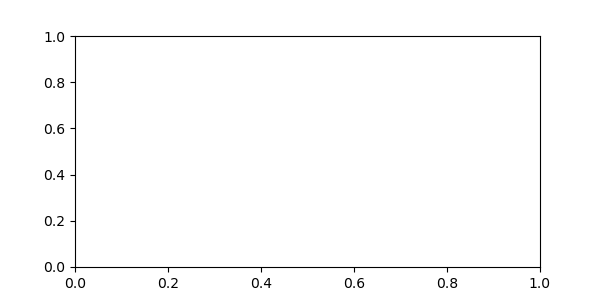

In [ ]:
import heatConduction as hc
importlib.reload(hc)

Next cell initiates solution of the problem. The result temperature profiles, last cache and coefficients are contained in these four variables accordingly

In [129]:
results, cache, alphas, betas = hc.solve(paras)

 Heat Conduction Solver
 [Step] [Time] [Iter] [Residue] [vector F max] [Max beta] [Max alpha] [Minimal T] [Maximal T] [meanEnergy]
[  1 ] [  0.00 ] [30 ] [     NAN ] [     NAN ] [     NAN ] [     NAN ] [     NAN ] [     NAN ] [     NAN ]
[  2 ] [  0.00 ] [30 ] [     NAN ] [     NAN ] [     NAN ] [     NAN ] [     NAN ] [     NAN ] [     NAN ]
[  3 ] [  0.00 ] [30 ] [     NAN ] [     NAN ] [     NAN ] [     NAN ] [     NAN ] [     NAN ] [     NAN ]
[  4 ] [  0.00 ] [30 ] [     NAN ] [     NAN ] [     NAN ] [     NAN ] [     NAN ] [     NAN ] [     NAN ]
[  5 ] [  0.00 ] [30 ] [     NAN ] [     NAN ] [     NAN ] [     NAN ] [     NAN ] [     NAN ] [     NAN ]
[  6 ] [  0.00 ] [30 ] [     NAN ] [     NAN ] [     NAN ] [     NAN ] [     NAN ] [     NAN ] [     NAN ]
[  7 ] [  0.00 ] [30 ] [     NAN ] [     NAN ] [     NAN ] [     NAN ] [     NAN ] [     NAN ] [     NAN ]
[  8 ] [  0.00 ] [30 ] [     NAN ] [     NAN ] [     NAN ] [     NAN ] [     NAN ] [     NAN ] [     NAN ]
[  9 ] [  0.0

Traceback (most recent call last):
  File "/home/bogdanov1/.conda/envs/Bachenv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_14529/1595715397.py", line 1, in <module>
    results, cache, alphas, betas = hc.solve(paras)
  File "/home/bogdanov1/bachproject/bachproject/PyTorch/heatConduction.py", line 268, in solve
    cache = newtonIteration(para, cache)
  File "/home/bogdanov1/bachproject/bachproject/PyTorch/heatConduction.py", line 208, in newtonIteration
    alphas, betas = get_data_qless(para, para['x'], Tscaled, gradTscaled,Zscaled, \
  File "/home/bogdanov1/bachproject/bachproject/PyTorch/heatConduction.py", line 283, in get_data_qless
    if ind+lng>=len(x)+1:
  File "/home/bogdanov1/.conda/envs/Bachenv/lib/python3.10/site-packages/pandas/core/series.py", line 768, in __len__
    return len(self._mgr)
  File "/home/bogdanov1/.conda/envs/Bachenv/lib/python3.10/site-

The `results` is a numpy array consist of evolution of each time step over the domain. The `cache` file is a Python dictionary consists of some variables used by debugging. <br>
In order to view the results, import the postprocessing package and preprocess the results. <br>
The preprocess transform the numpy array into a Pandas DataFrame, with index as grid locations and columns as timings.

In [118]:
import postprocessing as pp
importlib.reload(pp)
T = pp.preprocess(paras, results)

## Visualization of $\alpha$ and $\beta$

In [119]:
import pandas as pd
alpha3d=pd.DataFrame(alphas, columns=T.columns,index=T.index)
beta3d=pd.DataFrame(betas, columns=T.columns,index=T.index)

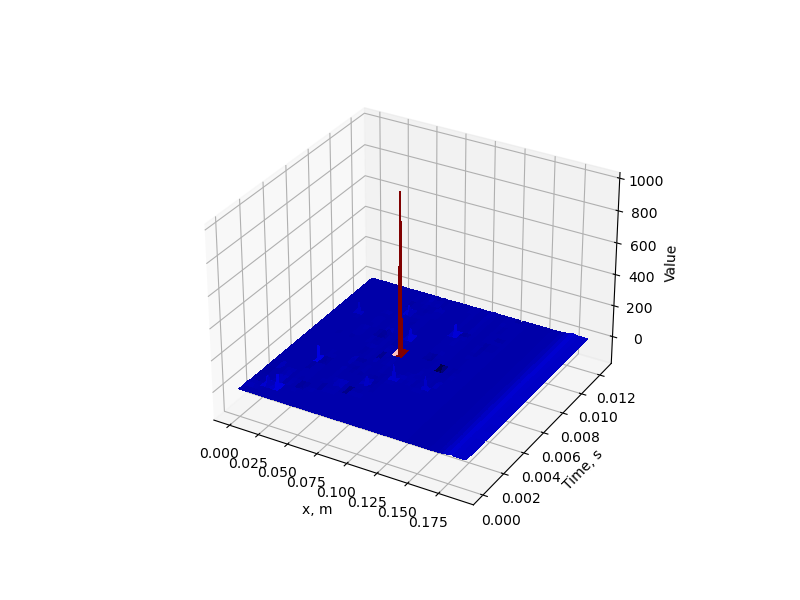

In [122]:
pp.evolutionField(alpha3d)

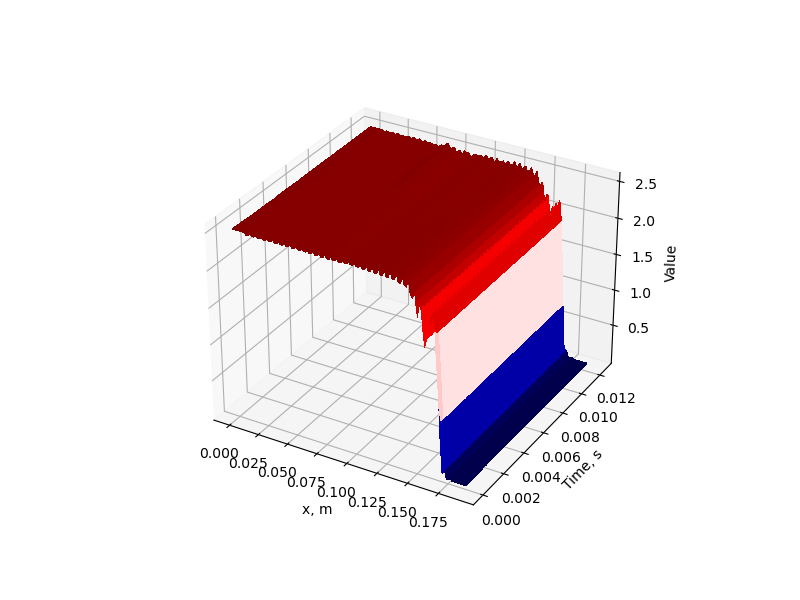

In [123]:
pp.evolutionField(beta3d)

## Visualization of temperature profiles
The first plot is the evolution field in both time and space. We can view the results in a 3D contour plot by just passing the processed T to the function evolutionField(). <br>
It can be seen that the temperature over the var is increasing as time elapses.

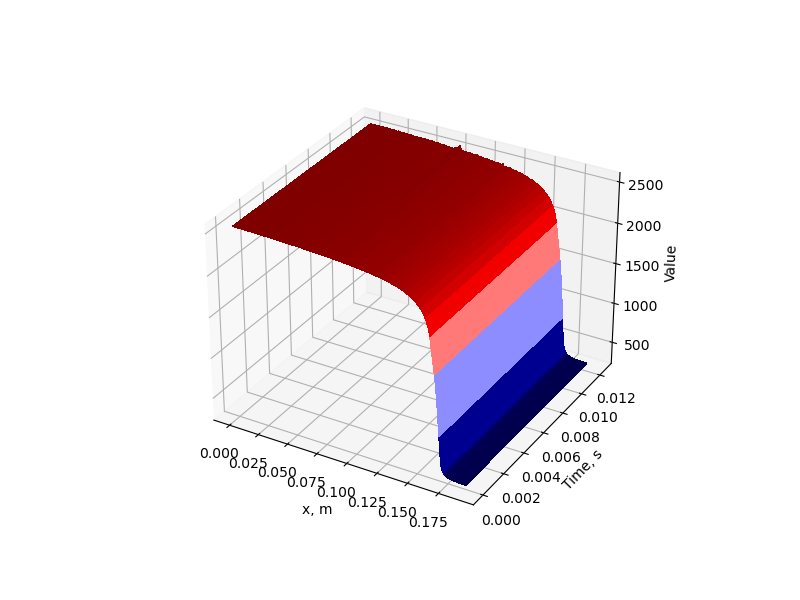

In [124]:
pp.evolutionField(T[T.columns])

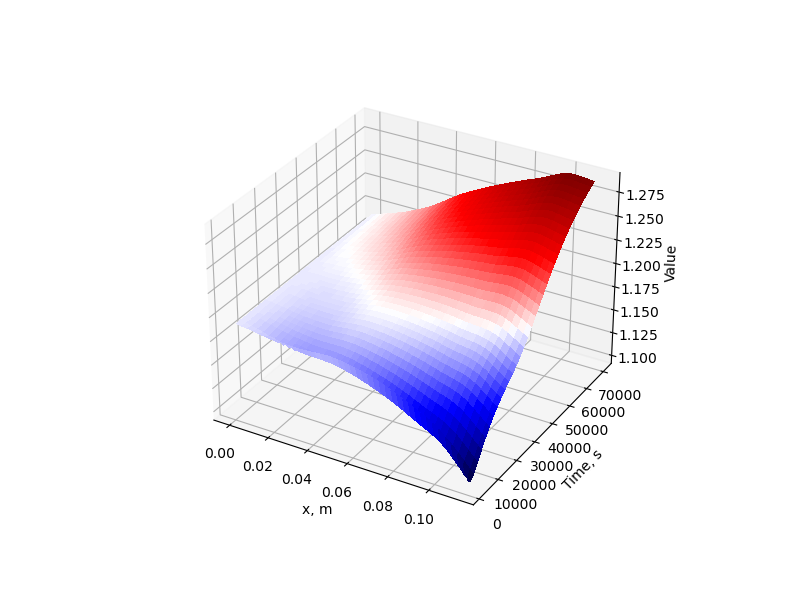

In [76]:
# E=(T.T*init_profile['ne'].values).T
# pp.evolutionField(E[E.columns[2:]].iloc[:120])

In [11]:
import numpy as np
init_profile=pd.read_csv('./PyTorch/init_profile.csv', index_col=(0))
init_profile=init_profile.iloc[::200,:]
cond=(init_profile['Zbar']+0.24)/(init_profile['Zbar']*(init_profile['Zbar']+4.2))
type(init_profile['ne'])
len(np.array(T.T.iloc[3])*init_profile['ne'].to_numpy())

200

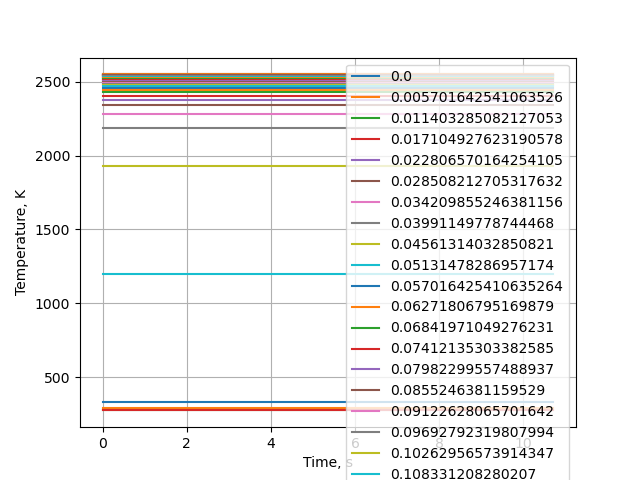

In [12]:
positions = T.index[::int(len(T)*3e-2)]
pp.thermalCouplePlot(T, positions)

We can futher check how the temperature is distributed over the domain at different times. Simply create a list of timings you want, and pass the T and times to the temperatureDistribution functions.

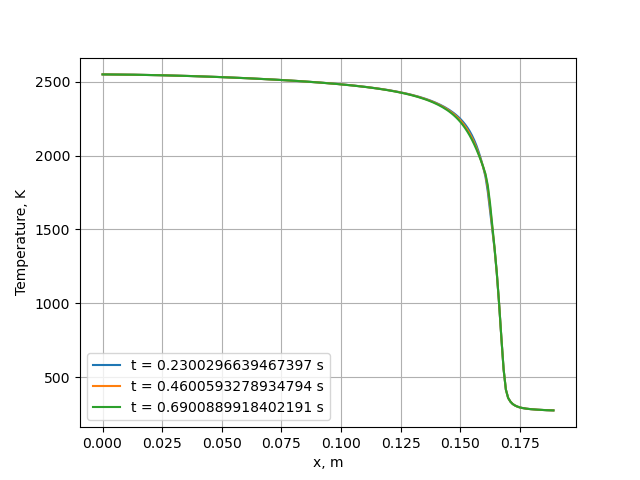

In [78]:
times = T.columns[::int(len(T.columns)/10)][1:4]
pp.temperatureDistribution(T, times)

This notebook and the whole structure of the modules solving the time evolution of temperature distribution are based on github heatConduction repository published by https://github.com/rickfu415